# Project Description:

#### In this particular project, we are using a dataset that contains information like, Age, Total Work Experience,
#### number of years in city, cost to request ratio etc. and using that to classify loan applicant’s Risk segmentation. 
#### However, before you go ahead with the project it is advised that you first preprocess the data, since it may 
#### contain some irregularities and noise. 
#### In addition, try various tricks and techniques in order to gain the best accuracy in your predictions. 

# Part-1: Data Exploration and Pre-processing

### 1) load the given dataset 
### 2) Check for the null values 
### 3) Get basic information from data 
### 4) Describe the dataset 
### 5) Display scatterplot between age & Total work Experience 
### 6) Display box plot for age 
### 7) Display box plot for Cibil score 
### 8) Create target and features data where target is Total bounces past 12 months

# Part-2: Working with Model 

### 1) Split data into training and testing sets 
### 2) Create a KNN classifier between Features and target data
### 3) Display the test score 
### 4) Display the training score 
### 5) Print the accuracy score 
### 6) Try 1 to 14 k values for classifier 
### 7) Display training and testing score for all the 1 to 14 k values

# Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
from sklearn.metrics import accuracy_score

# Path and Data

In [6]:
path = r"C:\Users\DELL\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx"

In [7]:
df = pd.read_excel(path)

In [8]:
df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


# Answer to Part-1: Data Exploration and Pre-processing

### 1) load the given dataset

In [9]:
path = r"C:\Users\DELL\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx"

In [10]:
df=pd.read_excel(path)

In [11]:
df

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


### 2) Check for the null values

In [12]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

### 3) Get basic information from data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


### 4) Describe the dataset

In [14]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


### 5) Display scatterplot between age & Total work Experience

Text(0.5, 1.0, 'Scatterplot between Age and Total Work Experience')

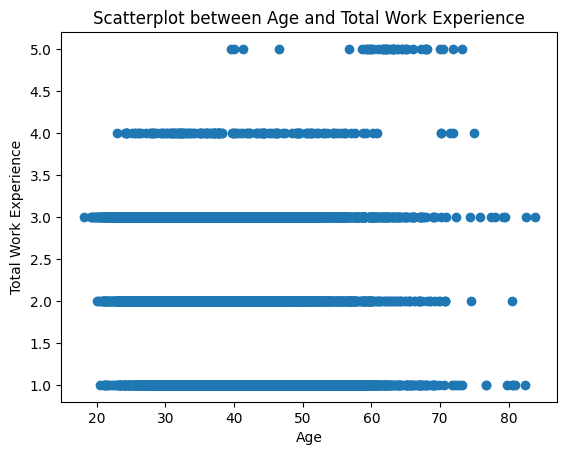

In [15]:
plt.scatter(df["Age"],df["Total Work Experience"])
plt.xlabel('Age')
plt.ylabel('Total Work Experience')
plt.title('Scatterplot between Age and Total Work Experience')

### 6) Display box plot for age

<Axes: ylabel='Age'>

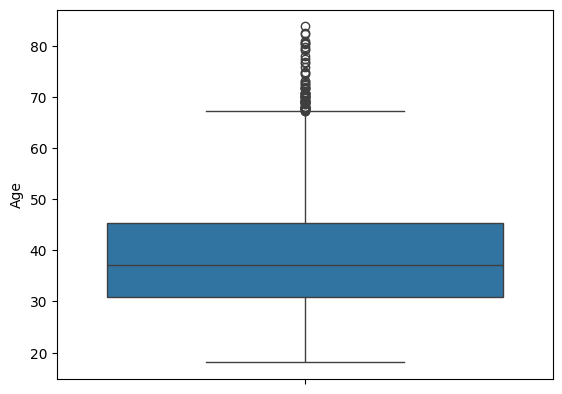

In [16]:
sns.boxplot(df["Age"])

### 7) Display box plot for Cibil score

<Axes: ylabel='Cibil score'>

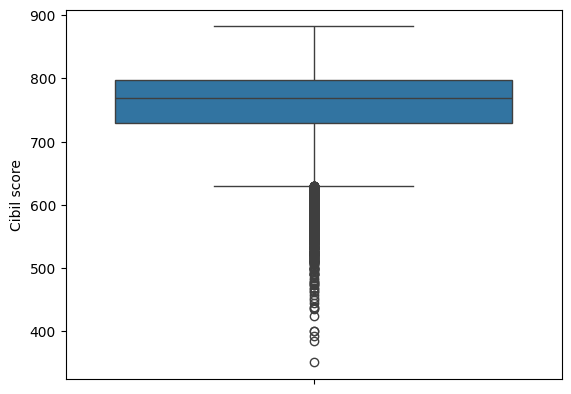

In [17]:
sns.boxplot(df["Cibil score"])

### 8) Create target and features data where target is Total bounces past 12 months

In [18]:
target=df["Total bounces past12months"]

In [19]:
target

0       0
1       0
2       0
3       0
4       1
       ..
8990    0
8991    0
8992    0
8993    0
8994    0
Name: Total bounces past12months, Length: 8995, dtype: int64

In [20]:
feature=df.drop(["Total bounces past12months"],axis=1)

In [21]:
feature

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0
...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0
8991,31.83,3,6,0.986793,532,0
8992,32.67,2,5,0.628330,590,0
8993,37.00,3,3,0.797193,812,0


# Answer of Part-2: Working with Model

### 1) Split data into training and testing sets

In [62]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.85,random_state=8)

In [63]:
x_train.shape

(7645, 6)

In [64]:
x_test.shape

(1350, 6)

### 2) Create a KNN classifier between Features and target data

In [74]:
model1=KNeighborsClassifier()

model1.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
model3=KNeighborsClassifier(n_neighbors=7)
model3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### 3) Display the test score

In [76]:
print(model1.score(x_test,y_test))

0.6437037037037037


In [77]:
print(model2.score(x_test,y_test))

0.6296296296296297


In [93]:
print(model3.score(x_test,y_test))

0.654074074074074


### 4) Display the training score

In [78]:
print(model1.score(x_train,y_train))

0.6790058862001308


In [79]:
print(model2.score(x_train,y_train))

0.7100065402223675


In [92]:
print(model3.score(x_train,y_train))

0.6680183126226291


### 5) Print the accuracy score

In [71]:
from sklearn.metrics import accuracy_score

In [80]:
y_pred = model1.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred)

0.6437037037037037

### 6) Try 1 to 14 k values for classifier

In [55]:
for i in range(1,15):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(x_train,y_train)
    print(model1.score(x_train,y_train))
    print(model1.score(x_test,y_test))

1.0
0.5466666666666666
0.7428384565075212
0.6288888888888889
0.7100065402223675
0.6296296296296297
0.6884238064094179
0.6422222222222222
0.6790058862001308
0.6437037037037037
0.6739045127534337
0.6488888888888888
0.6680183126226291
0.654074074074074
0.6648790058862001
0.6518518518518519
0.6614780902550687
0.6511111111111111
0.6600392413342053
0.6555555555555556
0.6583387835186396
0.6592592592592592
0.6575539568345323
0.66
0.6563767168083715
0.66
0.6553302812295618
0.6592592592592592


### 7) Display training and testing score for all the 1 to 14 k values

In [84]:
train=[]
test=[]
for i in range(1,15):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(x_train,y_train)
    train.append(model1.score(x_train,y_train))
    test.append(model1.score(x_test,y_test))

In [85]:
train

[1.0,
 0.7428384565075212,
 0.7100065402223675,
 0.6884238064094179,
 0.6790058862001308,
 0.6739045127534337,
 0.6680183126226291,
 0.6648790058862001,
 0.6614780902550687,
 0.6600392413342053,
 0.6583387835186396,
 0.6575539568345323,
 0.6563767168083715,
 0.6553302812295618]

In [86]:
test

[0.5466666666666666,
 0.6288888888888889,
 0.6296296296296297,
 0.6422222222222222,
 0.6437037037037037,
 0.6488888888888888,
 0.654074074074074,
 0.6518518518518519,
 0.6511111111111111,
 0.6555555555555556,
 0.6592592592592592,
 0.66,
 0.66,
 0.6592592592592592]

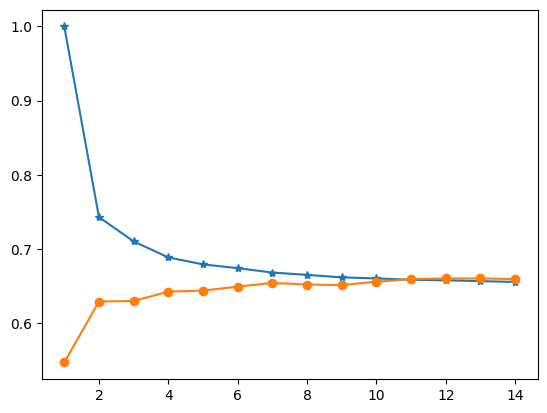

In [90]:
plt.plot(range(1,15),train,marker="*", label="Train Score")
plt.plot(range(1,15),test,marker="o", label="Test Score")

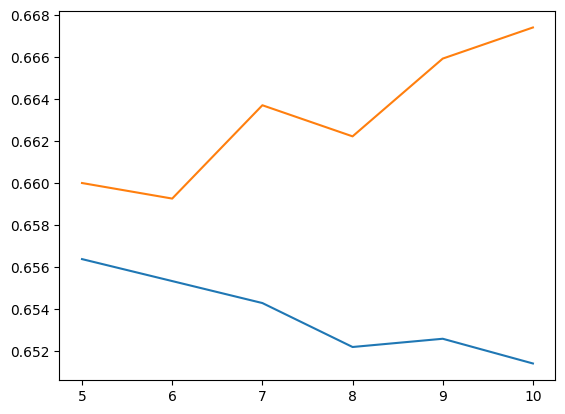

In [44]:
plt.plot(range(5,11),train[12:18])
plt.plot(range(5,11),test[12:18])

In [45]:
model1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
model1.predict_proba(x_test)

array([[0.57142857, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71428571, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85714286, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71428571, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85714286, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42857143, 0.57142857, 0.        , ..., 0.        , 0.        ,
        0.        ]])